<a href="https://colab.research.google.com/github/HuuskoJ/MNIST-CNN/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

## Import dependencies and load data

In [0]:
import numpy as np

from keras.layers import Dense, Conv2D, BatchNormalization, ReLU, Dropout, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train.shape)

Using TensorFlow backend.


(60000, 28, 28, 1)


## Build and train model

In [0]:
model = Sequential()
model.add(Conv2D(8, (5,5), padding='same', activation='linear', input_shape=(28,28, 1)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(padding='same'))
model.add(Conv2D(8, (5,5), padding='same',activation='linear'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Conv2D(8, (5,5), padding='same',activation='linear'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(padding='same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['categorical_accuracy'])

#model.fit(x_train, y_train, epochs=1,
#         validation_data=[x_test, y_test])



W0722 20:52:26.209053 140432305829760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 20:52:26.229576 140432305829760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 20:52:26.233877 140432305829760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 20:52:26.258662 140432305829760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0722 20:52:26.259500 1404323058

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 56us/step


[0.11900042921043932, 0.9614]

In [0]:
!pip install keract
import matplotlib.pyplot as plt
import random

ValueError: ignored

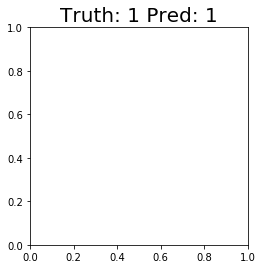

In [0]:
rand = random.randint(0,len(x_test)-1)
sample = x_test[rand]
truth = np.argmax(y_test[rand])
sample = sample.reshape(28,28)
pred_sample = sample.reshape(1,28, 28, 1)
pred = np.argmax(model.predict(pred_sample))
plt.title(f'Truth: {truth} Pred: {pred}', fontsize=20)
plt.imshow(sample, cmap='Grays')
plt.grid(False)
plt.show()


In [0]:
from keract import get_activations, display_activations, display_heatmaps

activations = get_activations(model, pred_sample)
display_activations(activations)

# GAN

In [0]:
discriminator = model
discriminator.add(Dense(1, activation='sigmoid'))    
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
print(discriminator.summary())


W0722 20:52:33.494559 140432305829760 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 8)         32        
_________________________________________________________________
re_lu_1 (ReLU)               (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1608      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 8)         32        
_________________________________________________________________
re_lu_2 (ReLU)               (None, 14, 14, 8)         0         
__________

In [0]:
from keras.layers import Reshape, Input, Conv2DTranspose, UpSampling2D, GaussianNoise, LeakyReLU, Activation

generator = Sequential()
generator.add(Dense(32, activation='relu', input_shape=(100,)))
#generator.add(GaussianNoise(5))
generator.add(Dense(64, activation='relu'))
generator.add(Dense(128, activation='relu'))
generator.add(Dense(392, activation='relu'))
generator.add(Reshape((7,7, 8)))
generator.add(UpSampling2D((2,2)))
generator.add(Conv2D(8, (5,5), activation='relu', padding='same'))
generator.add(UpSampling2D((2,2)))
#generator.add(Reshape((28,28, 8)))
generator.add(Conv2D(1, (5,5), activation='tanh', padding='same'))
"""
generator = Sequential()
# foundation for 7x7 image
n_nodes = 32 * 7 * 7
generator.add(Dense(n_nodes, input_dim=10))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Reshape((7, 7, 32)))
# upsample to 14x14
generator.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
generator.add(LeakyReLU(alpha=0.2))
# upsample to 28x28
generator.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Conv2D(1, (2,2), activation='sigmoid', padding='same'))
"""

def create_generator():
    
    net = Sequential()
    dropout_prob = 0.4
    
    net.add(Dense(7*7*256, input_dim=100))
    net.add(BatchNormalization(momentum=0.9))
    net.add(LeakyReLU())
    net.add(Reshape((7,7,256)))
    net.add(Dropout(dropout_prob))
    
    net.add(UpSampling2D())
    net.add(Conv2D(128, 5, padding='same'))
    net.add(BatchNormalization(momentum=0.9))
    net.add(LeakyReLU())
    
    net.add(UpSampling2D())
    net.add(Conv2D(64, 5, padding='same'))
    net.add(BatchNormalization(momentum=0.9))
    net.add(LeakyReLU())
    
    net.add(Conv2D(32, 5, padding='same'))
    net.add(BatchNormalization(momentum=0.9))
    net.add(LeakyReLU())
    
    net.add(Conv2D(1, 5, padding='same'))
    net.add(Activation('sigmoid'))
    
    return net
  
  
def create_discriminator():
    
    net = Sequential()
    input_shape = (28, 28, 1)
    dropout_prob = 0.4

    net.add(Conv2D(64, 5, strides=2, input_shape=input_shape, padding='same'))
    net.add(LeakyReLU())
    
    net.add(Conv2D(128, 5, strides=2, padding='same'))
    net.add(LeakyReLU())
    net.add(Dropout(dropout_prob))
    
    net.add(Conv2D(256, 5, strides=2, padding='same'))
    net.add(LeakyReLU())
    net.add(Dropout(dropout_prob))
    
    net.add(Conv2D(512, 5, strides=1, padding='same'))
    net.add(LeakyReLU())
    net.add(Dropout(dropout_prob))
    
    net.add(Flatten())
    net.add(Dense(1))
    net.add(Activation('sigmoid'))
    
    return net


generator = create_generator()
discriminator = create_discriminator()

In [0]:
from keras.models import Model

def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
  
gan = create_gan(discriminator, generator)
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_5 (Sequential)    (None, 28, 28, 1)         2394241   
_________________________________________________________________
sequential_6 (Sequential)    (None, 1)                 4311553   
Total params: 6,705,794
Trainable params: 2,368,705
Non-trainable params: 4,337,089
_________________________________________________________________


In [0]:
test_size = 1000

noise = np.random.uniform(-1.0, 1.0, size=[test_size, 100])
generated_images = generator.predict(noise)

In [0]:
# Real images from MNIST dataset
rand_set = np.random.randint(low=0,high=x_train.shape[0],size=test_size)
real_images = x_train[rand_set]
# Combine real images and fake images
X= np.concatenate([real_images, generated_images])


In [0]:
# Labels for generated and real data
y = np.zeros(2 * test_size)
y[:test_size] = 0.9

In [0]:
discriminator.trainable=True
discriminator.train_on_batch(X, y)

RuntimeError: ignored

In [0]:

test_size = 10000

noise = np.random.uniform(-1.0, 1.0, size=[test_size, 100])

y_gen = np.ones(test_size)

discriminator.trainable=False
loss = gan.fit(noise, y_gen, batch_size=32, epochs=20)

Epoch 1/20
10000/10000 [==============================] - 9s 869us/step - loss: 0.6561
Epoch 2/20
10000/10000 [==============================] - 7s 705us/step - loss: 0.6185
Epoch 3/20
10000/10000 [==============================] - 7s 703us/step - loss: 0.6142
Epoch 4/20
10000/10000 [==============================] - 7s 705us/step - loss: 0.6129
Epoch 5/20
10000/10000 [==============================] - 7s 706us/step - loss: 0.6120
Epoch 6/20
10000/10000 [==============================] - 7s 707us/step - loss: 0.6114
Epoch 7/20
10000/10000 [==============================] - 7s 711us/step - loss: 0.6116
Epoch 8/20
10000/10000 [==============================] - 7s 710us/step - loss: 0.6114
Epoch 9/20
10000/10000 [==============================] - 7s 712us/step - loss: 0.6111
Epoch 10/20
10000/10000 [==============================] - 7s 709us/step - loss: 0.6108
Epoch 11/20
10000/10000 [==============================] - 7s 711us/step - loss: 0.6100
Epoch 12/20
10000/10000 [================

gan.summary()

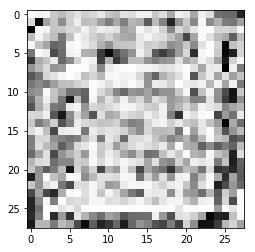

In [0]:
import matplotlib.pyplot as plt

# Plot generated image
pred = np.random.uniform(-1,1,100).reshape(1,100)
gen_img = generator.predict(pred)
gen_img = gen_img.reshape(28,28)
plt.imshow(gen_img, cmap='Greys')
plt.show()
